#Mount on Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/My Drive/'Deep  Learning Project'

/content/gdrive/My Drive/Deep  Learning Project


#Data preperation

In [0]:
#import required packages
import tensorflow as tf
import os
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import keras
from skimage import feature
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [0]:
#initialize training set
train_image, train_label= loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte',
                      )
#initialize testing set
test_image, test_label= loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte',
                      )

In [0]:
#reshape data into 28*28 pixels
train_data = train_image.reshape(-1,28,28)
test_data = test_image.reshape(-1,28,28)

In [0]:
#Min Max normalization
train_data = (train_data - train_data.min())/(train_data.max() - train_data.min())
test_data = (test_data - test_data.min())/(test_data.max() - test_data.min())

In [0]:
#devide the training data into 1/2, the first portion for training, the second portion for validation
val_data = train_data[40000:]
train_data = train_data[:40000]

val_label = train_label[40000:]
train_label = train_label[:40000]

In [8]:
print(np.shape(train_data))
print(np.shape(train_label))
print(np.shape(val_data))
print(np.shape(val_label))

(40000, 28, 28)
(40000,)
(20000, 28, 28)
(20000,)


##Early stopping training

In [0]:
class EarlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.05):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = EarlyStop()

#Raw pixel input

##model fitting and testing on different parameters
In this section, 8 different parameter settings are performed on training set and test set with raw pixel input.

In [0]:
#initialize ANN with one hidden layer with 128 neurons, activation function SGD with 0.1 learning rate
ann1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann1.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fit the model with raw pixel input
training_result = ann1.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3478 - accuracy: 0.9011 - val_loss: 0.2146 - val_accuracy: 0.9395
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1707 - accuracy: 0.9502 - val_loss: 0.1588 - val_accuracy: 0.9546
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9639 - val_loss: 0.1290 - val_accuracy: 0.9625
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0965 - accuracy: 0.9724 - val_loss: 0.1245 - val_accuracy: 0.9640
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0791 - accuracy: 0.9778 - val_loss: 0.1157 - val_accuracy: 0.9654
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9814 - val_loss: 0.1065 - val_accuracy: 0.9676
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0565 - accuracy: 0.9845 - val_loss: 0.1030 - val_accuracy:

In [0]:
## Evaluate the model's performance on test dataset.
ann1.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9731


[0.08699413388967514, 0.9731000065803528]

In [0]:
#initialize ANN with one hidden layer with 128 neurons, activation function SGD with 0.01 learning rate
ann2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann2.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fit the model with raw pixel input
training_result_2 = ann2.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7733 - accuracy: 0.8115 - val_loss: 0.4183 - val_accuracy: 0.8887
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8968 - val_loss: 0.3393 - val_accuracy: 0.9050
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3231 - accuracy: 0.9093 - val_loss: 0.3048 - val_accuracy: 0.9131
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2912 - accuracy: 0.9180 - val_loss: 0.2804 - val_accuracy: 0.9198
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9241 - val_loss: 0.2687 - val_accuracy: 0.9226
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9300 - val_loss: 0.2492 - val_accuracy: 0.9293
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2332 - accuracy: 0.9351 - val_loss: 0.2363 - val_accuracy:

In [0]:
## Evaluate the model's performance on test dataset.
ann2.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9580


[0.14315254986286163, 0.9580000042915344]

In [16]:
#initialize ANN with one hidden layer with 256 neurons, activation function SGD with 0.1 learning rate
ann3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann3.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fit the model with raw pixel input
training_result_3 = ann3.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3415 - accuracy: 0.9034 - val_loss: 0.2110 - val_accuracy: 0.9383
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1662 - accuracy: 0.9517 - val_loss: 0.1501 - val_accuracy: 0.9570
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1181 - accuracy: 0.9657 - val_loss: 0.1305 - val_accuracy: 0.9615
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0906 - accuracy: 0.9744 - val_loss: 0.1159 - val_accuracy: 0.9659
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0724 - accuracy: 0.9794 - val_loss: 0.1032 - val_accuracy: 0.9698
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0590 - accuracy: 0.9839 - val_loss: 0.0985 - val_accuracy: 0.9714
Epoch 7/20
1230/1250 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9875
Reached 95% accuracy so cancelling tra

In [17]:
## Evaluate the model's performance on test dataset.
ann3.evaluate(test_data, test_label)

313/313 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9764


[0.08170948922634125, 0.9764000177383423]

In [0]:
#initialize ANN with two hidden layer with 128 neurons each, activation function SGD with 0.1 learning rate
ann4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann4.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fit the model with raw pixel input
training_result_4 = ann4.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3252 - accuracy: 0.9024 - val_loss: 0.1645 - val_accuracy: 0.9525
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1361 - accuracy: 0.9601 - val_loss: 0.1246 - val_accuracy: 0.9633
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0949 - accuracy: 0.9718 - val_loss: 0.1125 - val_accuracy: 0.9660
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0709 - accuracy: 0.9790 - val_loss: 0.1104 - val_accuracy: 0.9663
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0992 - val_accuracy: 0.9704
Epoch 6/20
1248/1250 [============================>.] - ETA: 0s - loss: 0.0415 - accuracy: 0.9874
Reached 95% accuracy so cancelling training!
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0965 - val_accuracy: 0.9732


In [0]:
## Evaluate the model's performance on test dataset.
ann4.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9754


[0.08426110446453094, 0.9753999710083008]

In [0]:
#initialize ANN with two hidden layer with 128 neurons each, activation function Adam with 0.1 learning rate
ann5 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann5.compile(optimizer = tf.optimizers.Adam(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_5 = ann5.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

1250/1250 [==============================] - 3s 2ms/step - loss: 1.1569 - accuracy: 0.6726 - val_loss: 1.3048 - val_accuracy: 0.5764
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2190 - accuracy: 0.6026 - val_loss: 1.1829 - val_accuracy: 0.6565
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3351 - accuracy: 0.5592 - val_loss: 1.4140 - val_accuracy: 0.5372
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2532 - accuracy: 0.5648 - val_loss: 1.1721 - val_accuracy: 0.5813
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3514 - accuracy: 0.5422 - val_loss: 1.3976 - val_accuracy: 0.5446
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3606 - accuracy: 0.5398 - val_loss: 1.4309 - val_accuracy: 0.4983
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3404 - accuracy: 0.5339 - val_loss: 1.3753 - val_accuracy: 0.5465
Epo

In [0]:
## Evaluate the model's performance on test dataset.
ann5.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 1.6205 - accuracy: 0.5434


[1.620483636856079, 0.54339998960495]

In [0]:
#initialize ANN with one hidden layer with 128 neurons, activation function SGD with 0.01 learning rate
ann6 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann6.compile(optimizer = tf.optimizers.Adam(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_6 = ann6.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9225 - val_loss: 0.2445 - val_accuracy: 0.9326
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9518 - val_loss: 0.1796 - val_accuracy: 0.9516
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1392 - accuracy: 0.9610 - val_loss: 0.1858 - val_accuracy: 0.9532
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1326 - accuracy: 0.9642 - val_loss: 0.2071 - val_accuracy: 0.9514
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1220 - accuracy: 0.9679 - val_loss: 0.2320 - val_accuracy: 0.9525
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1145 - accuracy: 0.9707 - val_loss: 0.1961 - val_accuracy: 0.9570
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9732 - val_loss: 0.2156 - val_accuracy:

In [0]:
## Evaluate the model's performance on test dataset.
ann6.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.9613


[0.4163648784160614, 0.9613000154495239]

In [0]:
#initialize ANN with two hidden layer with 256 neurons each, activation function Adam with 0.1 learning rate
ann7 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann7.compile(optimizer = tf.optimizers.Adam(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_7 = ann7.fit(train_data, train_label, epochs=20,validation_data=(val_data, val_label), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2690 - accuracy: 0.9198 - val_loss: 0.2119 - val_accuracy: 0.9443
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1771 - accuracy: 0.9502 - val_loss: 0.2020 - val_accuracy: 0.9450
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1418 - accuracy: 0.9607 - val_loss: 0.1790 - val_accuracy: 0.9543
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1295 - accuracy: 0.9657 - val_loss: 0.1898 - val_accuracy: 0.9607
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1131 - accuracy: 0.9697 - val_loss: 0.2682 - val_accuracy: 0.9491
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1177 - accuracy: 0.9701 - val_loss: 0.2273 - val_accuracy: 0.9546
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1146 - accuracy: 0.9716 - val_loss: 0.2314 - val_accuracy:

In [0]:
## Evaluate the model's performance on test dataset.
ann7.evaluate(test_data, test_label)

313/313 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.9654


[0.3950435519218445, 0.965399980545044]

In [0]:
#initialize ANN with two hidden layer with 128 neurons each, activation function Adam with 0.01 learning rate
ann8 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann8.compile(optimizer = tf.optimizers.Adam(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result8 = ann8.fit(train_data, train_label, epochs=10,validation_data=(val_data, val_label), callbacks=[callbacks])

Epoch 1/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3108 - accuracy: 0.9096 - val_loss: 0.2004 - val_accuracy: 0.9427
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1964 - accuracy: 0.9460 - val_loss: 0.2033 - val_accuracy: 0.9445
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1716 - accuracy: 0.9532 - val_loss: 0.1825 - val_accuracy: 0.9504
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1513 - accuracy: 0.9596 - val_loss: 0.2154 - val_accuracy: 0.9495
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1531 - accuracy: 0.9603 - val_loss: 0.2193 - val_accuracy: 0.9504
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1305 - accuracy: 0.9654 - val_loss: 0.1961 - val_accuracy: 0.9505
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1322 - accuracy: 0.9661 - val_loss: 0.1999 - val_accuracy:

In [0]:
## Evaluate the model's performance on test dataset.
ann8.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9644


[0.19952823221683502, 0.9643999934196472]

#HOG feature extraction

##Hog feature extraction parameter setting

In [0]:
#initialize lists for storing transfomred values
train_data_h1 = []
train_data_h2 = []
train_data_h3 = []
train_data_h4 = []
train_val_h1 = []
train_val_h2 = []
train_val_h3 = []
train_val_h4 = []


train_label_h = []
val_label_h = []
# loop over the training images
for img_index in range(len(train_data)):
  # load the image, and extract HOG features
  image_h = (train_data[img_index])

  hog_1 = feature.hog(image_h, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  hog_2 = feature.hog(image_h, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1-sqrt")
  hog_3 = feature.hog(image_h, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  hog_4 = feature.hog(image_h, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1-sqrt")
  # update the data and labels
  train_data_h1.append(hog_1)
  train_data_h2.append(hog_2)
  train_data_h3.append(hog_3)
  train_data_h4.append(hog_4)
  train_label_h.append(train_label[img_index])

for img in range(len(val_data)):
  img_h = (val_data[img])
  hog_v1 = feature.hog(img_h, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  hog_v2 = feature.hog(img_h, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1-sqrt")
  hog_v3 = feature.hog(img_h, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  hog_v4 = feature.hog(img_h, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1-sqrt")
 

  train_val_h1.append(hog_v1)
  train_val_h2.append(hog_v2)
  train_val_h3.append(hog_v3)
  train_val_h4.append(hog_v4)
  val_label_h.append(val_label[img])

In [0]:
#Convert all lists into arrays
train_data_h1 = np.asarray(train_data_h1)
train_data_h2 = np.asarray(train_data_h2)
train_data_h3 = np.asarray(train_data_h3)
train_data_h4 = np.asarray(train_data_h4)
train_val_h1 = np.asarray(train_val_h1)
train_val_h2 = np.asarray(train_val_h2)
train_val_h3 = np.asarray(train_val_h3)
train_val_h4 = np.asarray(train_val_h4)
val_label_h = np.asarray(val_label_h)
train_label_h = np.asarray(train_label_h)

In [19]:
np.shape(train_data_h1)

(40000, 36)

In [20]:
np.shape(train_data_h3)

(40000, 144)

###Model trainig and testing 1

In [21]:
ann9 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[36]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann9.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_9 = ann9.fit(train_data_h1, train_label_h, epochs=20, validation_data=(train_val_h1, val_label_h), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 2s 2ms/step - loss: 1.2298 - accuracy: 0.6800 - val_loss: 0.7035 - val_accuracy: 0.7886
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6337 - accuracy: 0.8001 - val_loss: 0.5775 - val_accuracy: 0.8143
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.8185 - val_loss: 0.5309 - val_accuracy: 0.8314
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.8283 - val_loss: 0.5169 - val_accuracy: 0.8346
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5175 - accuracy: 0.8338 - val_loss: 0.5021 - val_accuracy: 0.8357
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5022 - accuracy: 0.8374 - val_loss: 0.4814 - val_accuracy: 0.8433
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4888 - accuracy: 0.8423 - val_loss: 0.4666 - val_accuracy:

In [22]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_1 = []
labels_test = []
data_test_1=[]
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H1 = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann9.predict(H1.reshape(1, -1))[0]
  # update the data and labels
  predict_test_1.append(pred)
  data_test_1.append(H1)
  
  labels_test.append(test_label[img_ind])
  
print(np.shape(predict_test_1))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [0]:
data_test_1 = np.asarray(data_test_1)
labels_test = np.asarray(labels_test)

In [24]:
ann9.evaluate(data_test_1,labels_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8835


[0.3487875461578369, 0.8834999799728394]

###Model training and testing 2

In [25]:
ann10 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[36]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann10.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_9 = ann10.fit(train_data_h2, train_label_h, epochs=20, validation_data=(train_val_h2, val_label_h),callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 2s 2ms/step - loss: 1.2442 - accuracy: 0.6869 - val_loss: 0.6629 - val_accuracy: 0.8126
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5791 - accuracy: 0.8222 - val_loss: 0.5148 - val_accuracy: 0.8343
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5016 - accuracy: 0.8397 - val_loss: 0.4726 - val_accuracy: 0.8497
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4715 - accuracy: 0.8471 - val_loss: 0.4525 - val_accuracy: 0.8551
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4525 - accuracy: 0.8526 - val_loss: 0.4368 - val_accuracy: 0.8596
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4373 - accuracy: 0.8580 - val_loss: 0.4240 - val_accuracy: 0.8633
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.8623 - val_loss: 0.4087 - val_accuracy:

In [26]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_2 = []
labels_test = []
data_test_2=[]
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H2 = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1-sqrt")
  pred = ann10.predict(H2.reshape(1, -1))[0]
  # update the data and labels
  predict_test_2.append(pred)
  data_test_2.append(H2)
  
  labels_test.append(test_label[img_ind])
  
print(np.shape(predict_test_2))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [27]:
pred_2 = []
for i in range(len(predict_test_2)):
  p = np.argmax(predict_test_2[i])
  pred_2.append(p)

np.shape(pred_2)

(10000,)

In [28]:
accuracy_score(labels_test, pred_2)

0.9051

###Model training and testing 3

In [29]:
ann11 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[144]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann11.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_11 = ann11.fit(train_data_h3, train_label_h, epochs=20, validation_data=(train_val_h3, val_label_h), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6654 - accuracy: 0.8376 - val_loss: 0.3015 - val_accuracy: 0.9130
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.9190 - val_loss: 0.2487 - val_accuracy: 0.9215
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2279 - accuracy: 0.9286 - val_loss: 0.2224 - val_accuracy: 0.9302
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2081 - accuracy: 0.9334 - val_loss: 0.2098 - val_accuracy: 0.9333
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1955 - accuracy: 0.9377 - val_loss: 0.2121 - val_accuracy: 0.9324
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1870 - accuracy: 0.9396 - val_loss: 0.1974 - val_accuracy: 0.9362
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1798 - accuracy: 0.9417 - val_loss: 0.1848 - val_accuracy:

In [30]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_3 = []
labels_test = []
data_test_3 = []
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H3 = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann11.predict(H3.reshape(1, -1))[0]
  # update the data and labels
  predict_test_3.append(pred)
  data_test_3.append(H3)
  
  labels_test.append(test_label[img_ind])
  
print(np.shape(predict_test_3))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [31]:
pred_3 = []
for i in range(len(predict_test_3)):
  p = np.argmax(predict_test_3[i])
  pred_3.append(p)

np.shape(pred_3)

(10000,)

In [32]:
accuracy_score(labels_test, pred_3)

0.9551

###Model training and testing 4

In [33]:
ann12 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[144]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann12.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_12 = ann12.fit(train_data_h4, train_label_h, epochs=20, validation_data=(train_val_h4, val_label_h),callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6811 - accuracy: 0.8345 - val_loss: 0.2952 - val_accuracy: 0.9166
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2583 - accuracy: 0.9250 - val_loss: 0.2284 - val_accuracy: 0.9304
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2157 - accuracy: 0.9355 - val_loss: 0.2018 - val_accuracy: 0.9375
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1953 - accuracy: 0.9395 - val_loss: 0.1922 - val_accuracy: 0.9387
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1821 - accuracy: 0.9431 - val_loss: 0.1843 - val_accuracy: 0.9416
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1728 - accuracy: 0.9455 - val_loss: 0.1731 - val_accuracy: 0.9433
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1653 - accuracy: 0.9477 - val_loss: 0.1684 - val_accuracy:

In [34]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_4 = []
labels_test = []
data_test_4 = []
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H4 = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann12.predict(H4.reshape(1, -1))[0]
  # update the data and labels
  predict_test_4.append(pred)
  data_test_4.append(H4)
  
  labels_test.append(test_label[img_ind])
  
print(np.shape(predict_test_4))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [35]:
pred_4 = []
for i in range(len(predict_test_4)):
  p = np.argmax(predict_test_4[i])
  pred_4.append(p)

np.shape(pred_4)

(10000,)

In [36]:
accuracy_score(labels_test, pred_4)

0.9374

It is discovered that increasing the complexity of the model doesn't increase the performance of ANN with HOG feature extraction

##Hyperparameter tuning

In [30]:
ann11 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[144]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann11.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_11 = ann11.fit(train_data_h3, train_label_h, epochs=20, validation_data=(train_val_h3, val_label_h), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5357 - accuracy: 0.8450 - val_loss: 0.2519 - val_accuracy: 0.9188
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2232 - accuracy: 0.9270 - val_loss: 0.2236 - val_accuracy: 0.9261
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1911 - accuracy: 0.9376 - val_loss: 0.1897 - val_accuracy: 0.9381
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1697 - accuracy: 0.9443 - val_loss: 0.1918 - val_accuracy: 0.9372
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1533 - accuracy: 0.9494 - val_loss: 0.1639 - val_accuracy: 0.9469
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1417 - accuracy: 0.9530 - val_loss: 0.1486 - val_accuracy: 0.9518
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1311 - accuracy: 0.9574 - val_loss: 0.1633 - val_accuracy:

In [31]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_3 = []
labels_test = []
data_test_3 = []
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H3 = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann11.predict(H3.reshape(1, -1))[0]
  # update the data and labels
  predict_test_3.append(pred)
  data_test_3.append(H3)
  
  labels_test.append(test_label[img_ind])
  
print(np.shape(predict_test_3))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [0]:
data_test_3 = np.asarray(data_test_3)
labels_test = np.asarray(labels_test)

In [35]:
ann11.evaluate(data_test_3,labels_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9609


[0.12316721677780151, 0.9609000086784363]

In [36]:
ann11 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[144]), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
ann11.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_result_11 = ann11.fit(train_data_h3, train_label_h, epochs=20, validation_data=(train_val_h3, val_label_h), callbacks = [callbacks])

Epoch 1/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6446 - accuracy: 0.8451 - val_loss: 0.2976 - val_accuracy: 0.9151
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2650 - accuracy: 0.9193 - val_loss: 0.2415 - val_accuracy: 0.9237
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2267 - accuracy: 0.9288 - val_loss: 0.2229 - val_accuracy: 0.9270
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2071 - accuracy: 0.9344 - val_loss: 0.2056 - val_accuracy: 0.9345
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1947 - accuracy: 0.9375 - val_loss: 0.1992 - val_accuracy: 0.9344
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1847 - accuracy: 0.9405 - val_loss: 0.1883 - val_accuracy: 0.9383
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1760 - accuracy: 0.9431 - val_loss: 0.1887 - val_accuracy:

In [37]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_3 = []
labels_test = []
data_test_3 = []
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H3 = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann11.predict(H3.reshape(1, -1))[0]
  # update the data and labels
  predict_test_3.append(pred)
  data_test_3.append(H3)
  
  labels_test.append(test_label[img_ind])
  
print(np.shape(predict_test_3))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [0]:
data_test_3 = np.asarray(data_test_3)
labels_test = np.asarray(labels_test)

In [41]:
ann11.evaluate(data_test_3,labels_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.9543


[0.13972465693950653, 0.9542999863624573]

As we can see from the above attemps, the best performing pair of HOG feature extraction will be *pixel_per_cell* = (8,8), *cell_size* = (2,2) and *blcok_norm* = 'L2-Hys'

#Experiment Results

##Confusion Matrix

In [0]:
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Accuracy',cmap=plt.cm.Reds):

  if normalize:
    cm =cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  #initialize plot settings
  plt.figure(figsize=(12,12))
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j]> thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

In [0]:
prediction = ann3.predict(test_data)

In [61]:
np.shape(prediction)

(10000, 10)

In [85]:
pred = []
for i in range(len(prediction)):
  p = np.argmax(prediction[i])
  pred.append(p)

np.shape(pred)

(10000,)

Normalized confusion matrix
[[9.91836735e-01 0.00000000e+00 1.02040816e-03 0.00000000e+00
  0.00000000e+00 1.02040816e-03 2.04081633e-03 1.02040816e-03
  2.04081633e-03 1.02040816e-03]
 [0.00000000e+00 9.90308370e-01 1.76211454e-03 8.81057269e-04
  0.00000000e+00 8.81057269e-04 2.64317181e-03 8.81057269e-04
  2.64317181e-03 0.00000000e+00]
 [4.84496124e-03 4.84496124e-03 9.68992248e-01 4.84496124e-03
  1.93798450e-03 0.00000000e+00 5.81395349e-03 4.84496124e-03
  3.87596899e-03 0.00000000e+00]
 [9.90099010e-04 0.00000000e+00 1.98019802e-03 9.86138614e-01
  0.00000000e+00 2.97029703e-03 0.00000000e+00 1.98019802e-03
  2.97029703e-03 2.97029703e-03]
 [4.07331976e-03 0.00000000e+00 0.00000000e+00 1.01832994e-03
  9.76578411e-01 0.00000000e+00 7.12830957e-03 2.03665988e-03
  2.03665988e-03 7.12830957e-03]
 [6.72645740e-03 0.00000000e+00 0.00000000e+00 1.12107623e-02
  1.12107623e-03 9.58520179e-01 1.23318386e-02 0.00000000e+00
  6.72645740e-03 3.36322870e-03]
 [6.26304802e-03 3.13152401e-0

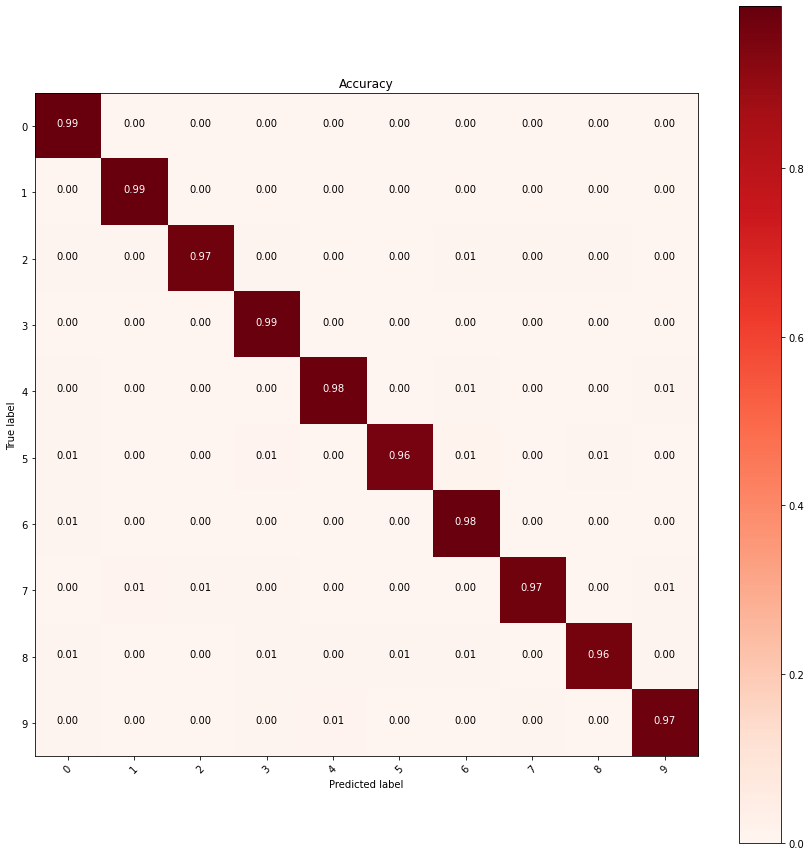

In [63]:
#plot confusion matrix
Con_Matrix = metrics.confusion_matrix(test_label,pred)

plot_confusion_matrix(Con_Matrix,["0","1","2","3","4","5","6","7","8","9"],normalize=True)

##Visualization of wrong predictions

In [0]:
#Stroing all wrong predicted values in a list
wrongPredictionIndexes = []
i = 0
for actual, prediction in zip(test_label, pred):
    if actual != prediction:
        wrongPredictionIndexes.append(i)
    i = i + 1

In [90]:
#print the total number of wrong predictions
np.shape(wrongPredictionIndexes)

(236,)

[156 100]


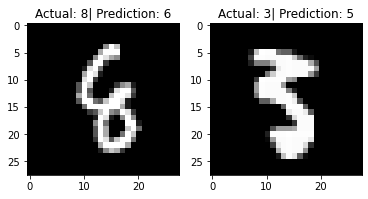

In [104]:
#randomly select 2 wrong predictions for visualization
randomIntList = np.random.randint(len(wrongPredictionIndexes), size = 2)
print(randomIntList)
plot = 1
plt.figure()
for randomNum in randomIntList:
    plt.subplot(1,len(randomIntList),plot)
    imageIndex = wrongPredictionIndexes[randomNum]
    plt.imshow(test_data[imageIndex], cmap = 'gray')
    plt.title("Actual: " + str(test_label[imageIndex]) + "| Prediction: " + str(pred[imageIndex]))
        
    plot = plot + 1